In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

initial_recurrence = 9

def line_decay(max_value, min_value, num_points, decay_rate=3):
    # Generate an exponentially decaying sequence
    x = np.linspace(1, 0, num_points)[1:-1]
    # y = (max_value - min_value) * np.exp(-decay_rate * x) + min_value
    y = (max_value - min_value) * x + min_value
    zeros = np.zeros(num_points)[1:-1]
    return pd.DataFrame({'oil_pressure_u2': y, 'oil_pump_u2': zeros})

def line_rise(max_value, min_value, num_points, constant_value=1):
    # Generate a linearly increasing sequence
    x = np.linspace(0, 1, num_points)
    y = (max_value - min_value) * x + min_value
    z = np.full(num_points, constant_value)
    return pd.DataFrame({'oil_pressure_u2': y, 'oil_pump_u2': z})

def generate_data_with_slower_increase(rise_points, decay_points, initial_recurrence, repetitions, growth_factor):
    # Generate constant line rise data
    line = line_rise(144, 130, rise_points)
    decay = line_decay(144, 130, decay_points)
    
    combined = decay
    
    # Loop through the repetitions, increasing the line_rise segment proportionally
    for i in range(initial_recurrence):
        # Concatenate decay and the increasing line segment
        combined = pd.concat([combined, line, decay], axis=0, ignore_index=True)

    temp_num_points = rise_points
    # Loop through the repetitions, increasing the line_rise segment proportionally
    for i in range(repetitions):
        line = line_rise(144, 130, int(temp_num_points))
        # print(line, '\n', decay ,'-------')
        # Concatenate decay and the increasing line segment
        combined = pd.concat([combined, line, decay], axis=0, ignore_index=True)
        
        # Increase the number of points for the next line_rise by the growth factor
        temp_num_points *= growth_factor
        
    for i in range(initial_recurrence):
        # Concatenate decay and the increasing line segment
        line = line_rise(144, 130, int(rise_points))
        combined = pd.concat([combined, line, decay], axis=0, ignore_index=True)
    
    return combined

def generate_combined_data_with_faster_decay(rise_points, decay_points, initial_recurrence, repetitions, decay_factor=0.8):
    # Generate constant line rise data
    line = line_rise(144, 130, rise_points)
    decay = line_decay(144, 130, decay_points)
    
    combined = decay    
    for i in range(initial_recurrence):        
        # Concatenate decay and the constant line segment
        combined = pd.concat([combined, line[:-1], decay], axis=0, ignore_index=True)

    # Loop through the repetitions, reducing the number of points for exponential decay each time
    temp_num_points = decay_points
    for i in range(repetitions):
        decay = line_decay(144, 130, int(temp_num_points))
        
        # Concatenate decay and the constant line segment
        combined = pd.concat([combined, line[:-1], decay], axis=0, ignore_index=True)
        
        # Reduce the number of points for the next exponential decay
        temp_num_points *= decay_factor
    
    for i in range(initial_recurrence):
        decay = line_decay(144, 130, int(decay_points))
        # Concatenate decay and the increasing line segment
        combined = pd.concat([combined, line[:-1], decay], axis=0, ignore_index=True)
        
    return combined


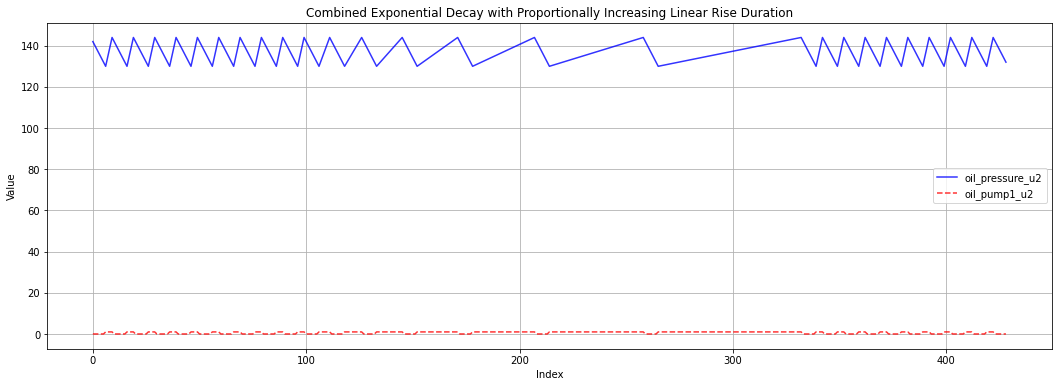

In [79]:
# Generate the final combined data with increasing durations of line_rise proportionally
rise_points = 4
decay_points = 8

pump_failure = generate_data_with_slower_increase(rise_points, decay_points, initial_recurrence, repetitions=8, growth_factor=1.5)

# Plotting the final combined data
plt.figure(figsize=(18, 6))
plt.plot(pump_failure.index, pump_failure['oil_pressure_u2'], label='oil_pressure_u2', color='b', alpha=0.8)
plt.plot(pump_failure.index, pump_failure['oil_pump_u2'], label='oil_pump1_u2', color='r', linestyle='--', alpha=0.8)

plt.title('Combined Exponential Decay with Proportionally Increasing Linear Rise Duration')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


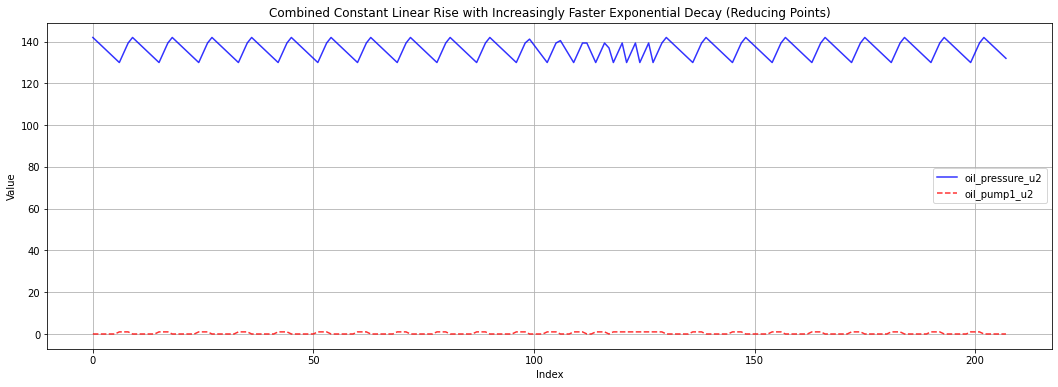

In [80]:
# Generate the final combined data with increasingly faster exponential decays
inter_leakage = generate_combined_data_with_faster_decay(rise_points, decay_points, initial_recurrence, repetitions=8, decay_factor=0.8)

# Plotting the final combined data with increasingly faster decays
plt.figure(figsize=(18, 6))
plt.plot(inter_leakage.index, inter_leakage['oil_pressure_u2'], label='oil_pressure_u2', color='b', alpha=0.8)
plt.plot(inter_leakage.index, inter_leakage['oil_pump_u2'], label='oil_pump1_u2', color='r', linestyle='--', alpha=0.8)

plt.title('Combined Constant Linear Rise with Increasingly Faster Exponential Decay (Reducing Points)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
def add_timestamp(data):
    data.index = pd.date_range(start='2024-04-01 00:00:00', periods=len(data), freq='5T')
    data['active_power_u2'] = np.zeros(len(data))
    data = data.iloc[:,[2,0,1]]
    data.index.name = 'timestamp'
    return data

pump_failure = add_timestamp(pump_failure)
pump_failure

,active_power_u2,oil_pressure_u2,oil_pump_u2
timestamp,,,
2024-04-01 00:00:00,0.0,142.0,0.0
2024-04-01 00:05:00,0.0,140.0,0.0
2024-04-01 00:10:00,0.0,138.0,0.0
2024-04-01 00:15:00,0.0,136.0,0.0
2024-04-01 00:20:00,0.0,134.0,0.0
...,...,...,...
2024-04-02 11:20:00,0.0,140.0,0.0
2024-04-02 11:25:00,0.0,138.0,0.0
2024-04-02 11:30:00,0.0,136.0,0.0


In [82]:
inter_leakage = add_timestamp(inter_leakage)
inter_leakage

,active_power_u2,oil_pressure_u2,oil_pump_u2
timestamp,,,
2024-04-01 00:00:00,0.0,142.0,0.0
2024-04-01 00:05:00,0.0,140.0,0.0
2024-04-01 00:10:00,0.0,138.0,0.0
2024-04-01 00:15:00,0.0,136.0,0.0
2024-04-01 00:20:00,0.0,134.0,0.0
...,...,...,...
2024-04-01 16:55:00,0.0,140.0,0.0
2024-04-01 17:00:00,0.0,138.0,0.0
2024-04-01 17:05:00,0.0,136.0,0.0


2024-04-01 08:50:00


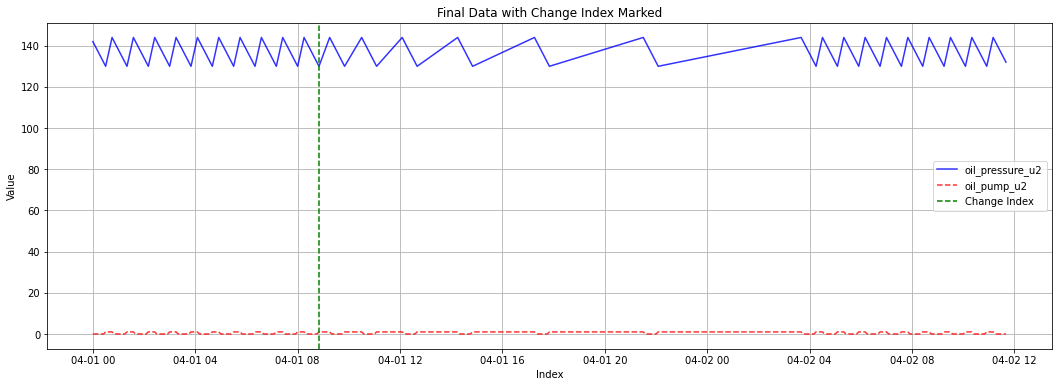

In [83]:
def identify_fault_label(data):
    # Identify positions where 'oil_pump1_u2' changes from 0 to 1
    change_positions = (data['oil_pump_u2'].shift(1) == 0) & (data['oil_pump_u2'] == 1)

    # Find the index of the occurrence
    change_index = change_positions[change_positions].index[initial_recurrence+1]
    recover_index = change_positions[change_positions].index[initial_recurrence+1+repetitions]
    
    # Display the index
    print(change_index)
    plt.figure(figsize=(18, 6))
    plt.plot(data.index, data['oil_pressure_u2'], label='oil_pressure_u2', color='b', alpha=0.8)
    plt.plot(data.index, data['oil_pump_u2'], label='oil_pump_u2', color='r', linestyle='--', alpha=0.8)

    # Mark the fifth change index
    plt.axvline(x=change_index, color='g', linestyle='--', label='Change Index')

    plt.title('Final Data with Change Index Marked')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    return change_index

pump_failure_label = identify_fault_label(pump_failure)
pump_failure.to_csv('pump_failure.csv')

2024-04-01 08:00:00


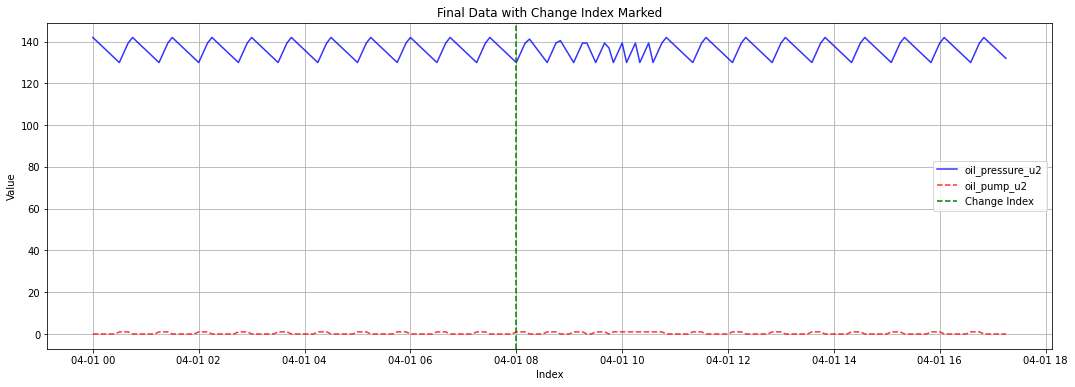

In [84]:
inter_leakage_label = identify_fault_label(inter_leakage)
inter_leakage.to_csv('inter_leakage.csv')

In [85]:
import json

data = {
    "pump_failure.csv": [
        [
            str(pump_failure_label)
        ]
    ],
    "inter_leakage.csv": [
        [
            str(inter_leakage_label)
        ]
    ]
}

with open("shf_labels.json", "w") as f:
    json.dump(data, f, indent=4)